In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('911 calls- Mongomery county/911.csv')
df = df[df['zip'] > 10000]

In [4]:
# lat: Latitude
# lng: Longitude
# desc: Description of Emergency
# zip: ZIP Code
# title: Title of Emergency
# time: StampDate and time of the call
# twp: Town
# addr: Address

In [5]:
print (df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
5  40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
5  19446.0         EMS: HEAD INJURY  2015-12-10 15:39:04           LANSDALE   

                         addr  e  
0      REINDEER CT & 

# Aspects to explore
1. How are emergencies ranked by frequency?<br>
    1.1. What are the top few most frequent emergencies in each type? <br>
    1.2. Subcategories by count.
    
2. Location based exploration <br>
    2.1. Do specific emergencies happen at specific places more than the others?
        - a. Plot emergency categories by 1. town,
                                          2. zip,
                                          3. Latitude, longitude
        - b. Under categories, plot each sub category by 1. town,
                                                         2. zip,
                                                         3. Latitude, longitude.
        
3. Time based exploration<br>
    3.1. Is there a specific time window when an emergency occurs?
        - a. By time of day
            - Plot emergency categories
                - Plot emergency subcategories
        - b. By month
            - Plot emergency categories
                - Plot emergency subcategories
                
4. Geo-temporal exploration<br>
    4.1. Do emergencies show any pattern?
        - a. At a given time, which place needs most attention? What type of attention is it?

In [6]:
df.columns = ['latitude','longitude','description','zip','type','time','town','address','if_emergency']

In [7]:
df.dtypes

latitude        float64
longitude       float64
description      object
zip             float64
type             object
time             object
town             object
address          object
if_emergency      int64
dtype: object

In [8]:
df['time'] = pd.to_datetime(df['time'])
print (df['time'].max())
print (df['time'].min())
print (df['time'].max() - df['time'].min())

2018-03-24 13:15:39
2015-12-10 14:39:21
834 days 22:36:18


In [9]:
df.count()

latitude        286832
longitude       286832
description     286832
zip             286832
type            286832
time            286832
town            286783
address         286832
if_emergency    286832
dtype: int64

In [10]:
df.head()

,latitude,longitude,description,zip,type,time,town,address,if_emergency
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1


## 1. General Exploration (1/4)

### 1.1. Ranking emergency categories by frequency

In [11]:
df2= df.groupby('type')

In [12]:
grouped = df.groupby('type').agg({'type':'count'}).sort_values('type')[::-1][:30]/len(df)*100

C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'type' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [13]:
grouped

,type
type,
Traffic: VEHICLE ACCIDENT -,22.573492
Traffic: DISABLED VEHICLE -,6.560983
Fire: FIRE ALARM,6.059296
EMS: RESPIRATORY EMERGENCY,5.467312
EMS: FALL VICTIM,5.401768
EMS: CARDIAC EMERGENCY,5.247322
EMS: SUBJECT IN PAIN,3.009427
Traffic: ROAD OBSTRUCTION -,3.004546
EMS: HEAD INJURY,2.809659


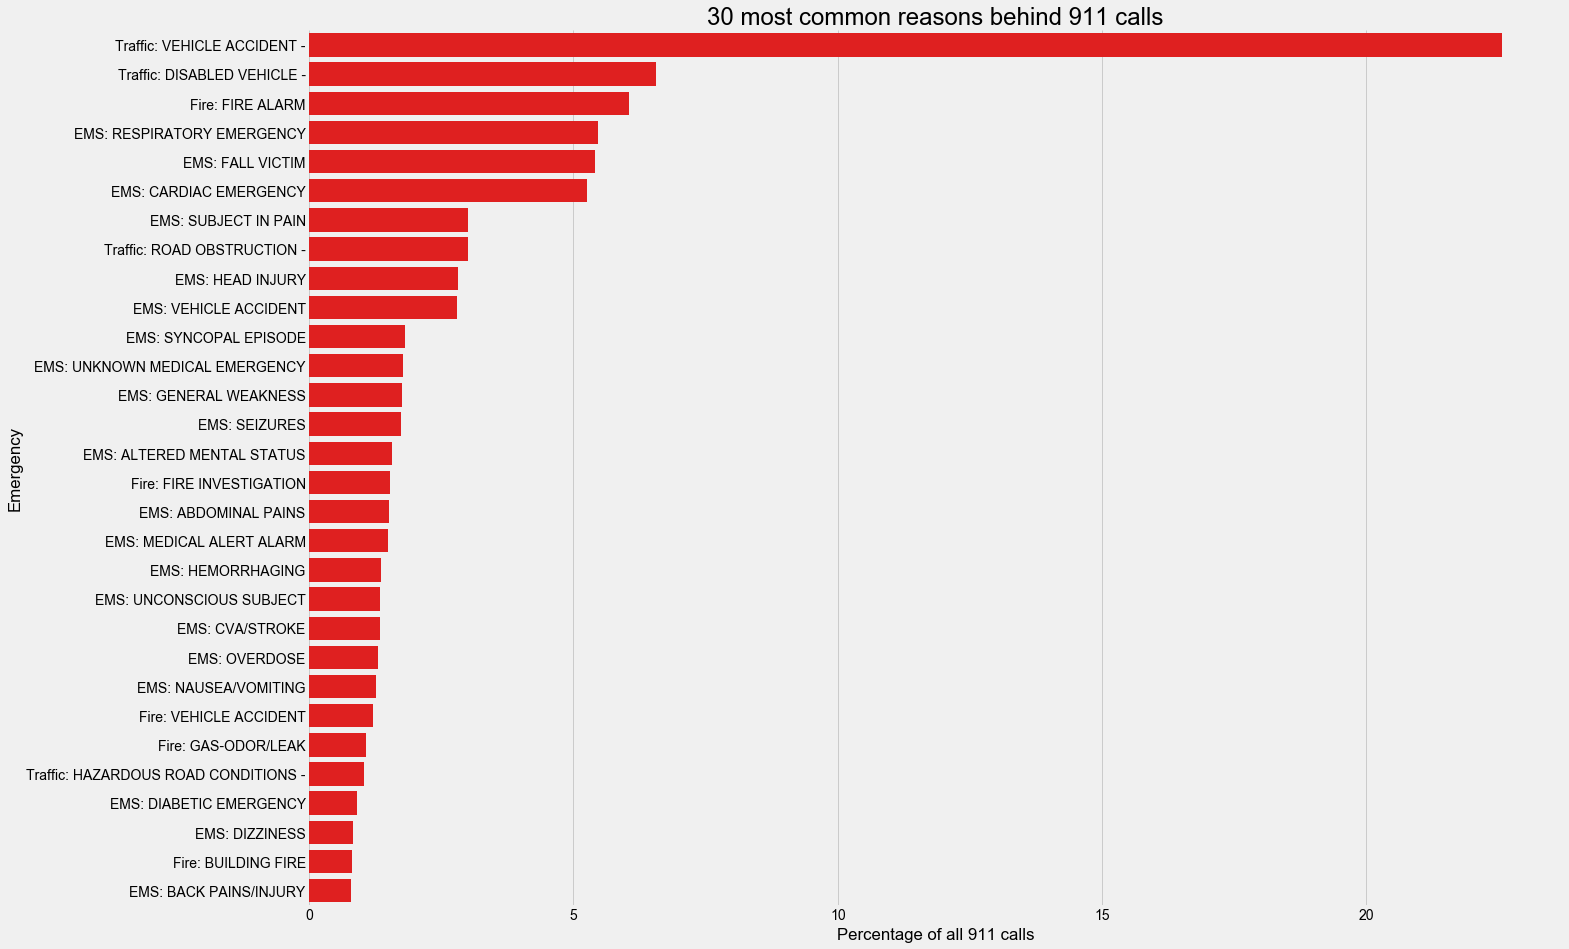

In [14]:
xi = grouped.values[:,0]
yi = grouped.index
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(20,15))
sns.barplot(x=xi,y=yi,color='r')

sns.set(font_scale=2)   
sns.despine(left=True, bottom=True)

sns.set(font_scale=2)
plt.xlim=(0,25)
plt.ylabel("Emergency")
plt.xlabel("Percentage of all 911 calls")
plt.title('30 most common reasons behind 911 calls')
plt.savefig('images/all_ranked.png', bbox_inches="tight")
plt.show()

In [15]:
## Categorizing data by emergency type
df_title_cat = pd.DataFrame(df.type.str.split(':',1).tolist(),columns = ['emergency_type','emergency_subtype'])
df_cat = df.copy()
del df_cat['type']
df_cat.insert(4,'emergency_type',df_title_cat['emergency_type'].values)
df_cat.insert(5,'emergency_subtype',df_title_cat['emergency_subtype'].values)

In [16]:
df_cat.head()

,latitude,longitude,description,zip,emergency_type,emergency_subtype,time,town,address,if_emergency
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS,HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1


In [17]:
grouped_by_type = df_cat.groupby('emergency_type').agg(
    {'emergency_type':'count'}).sort_values('emergency_type')[::-1][:10]/len(df_cat)*100

C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'emergency_type' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


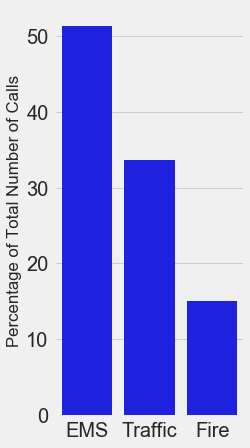

In [18]:
plt.style.use('fivethirtyeight')

grouped = grouped_by_type
yi = grouped.values[:,0]
xi = grouped.index
plt.subplots(figsize=(3,7))
plt.style.use('fivethirtyeight')

sns.barplot(x=xi,y=yi,color='b')


sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale=2)   
sns.despine(left=True, bottom=True)

sns.set(font_scale=1)
plt.xlim=(0,100)
plt.xlabel("")
plt.ylabel('Percentage of Total Number of Calls')
plt.savefig('images/types_ranked.png', bbox_inches="tight")
plt.show()
# plt.title('All 911 calls Grouped by Emergency Types')

In [19]:
grouped_by_emstype = df_cat[df_cat['emergency_type']=='EMS'].groupby('emergency_subtype').agg({
    'emergency_type':'count'}).sort_values('emergency_type')[::-1][:10]/len(df_cat)*100

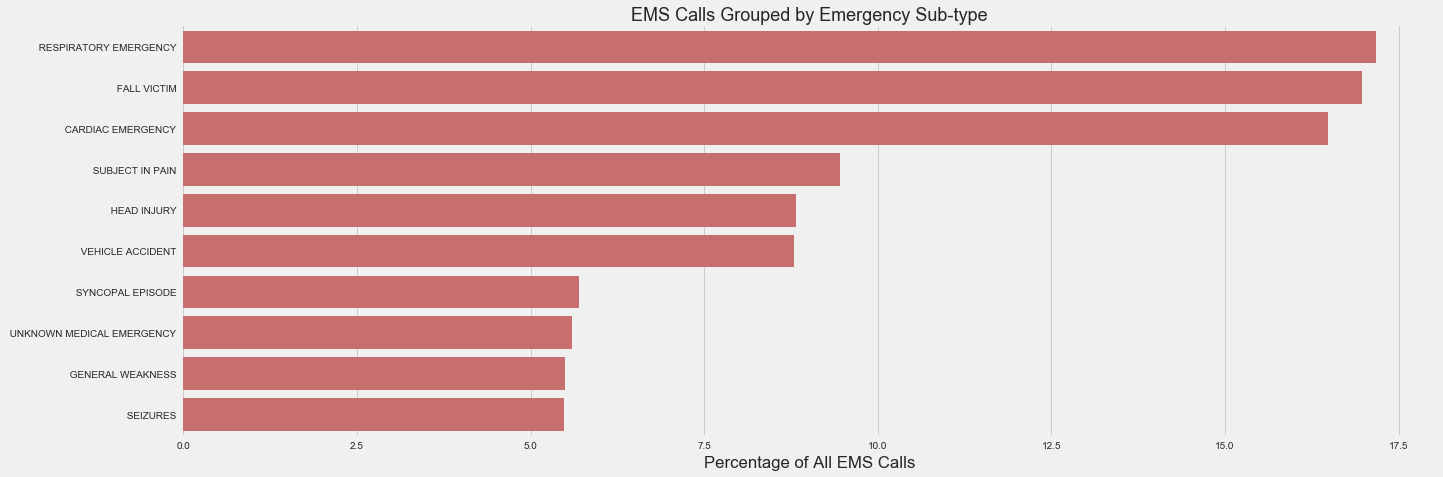

In [20]:
grouped = grouped_by_emstype
plt.style.use('fivethirtyeight')

xi = grouped.values[:,0]/sum(grouped.values[:,0])*100
yi = grouped.index
plt.subplots(figsize=(20,7))
sns.barplot(x=xi,y=yi,color='r')


sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale=2)   
sns.despine(left=True, bottom=True)

sns.set(font_scale=1.5)
plt.xlim=(0,100)
plt.ylabel("")
plt.xlabel("Percentage of All EMS Calls")
plt.title('EMS Calls Grouped by Emergency Sub-type')
plt.savefig('images/ems_subtype.png', bbox_inches="tight")
plt.show()

In [21]:
grouped_by_traffictype = df_cat[df_cat['emergency_type']=='Traffic'].groupby('emergency_subtype').agg({
    'emergency_type':'count'}).sort_values('emergency_type')[::-1][:10]/len(df_cat)*100

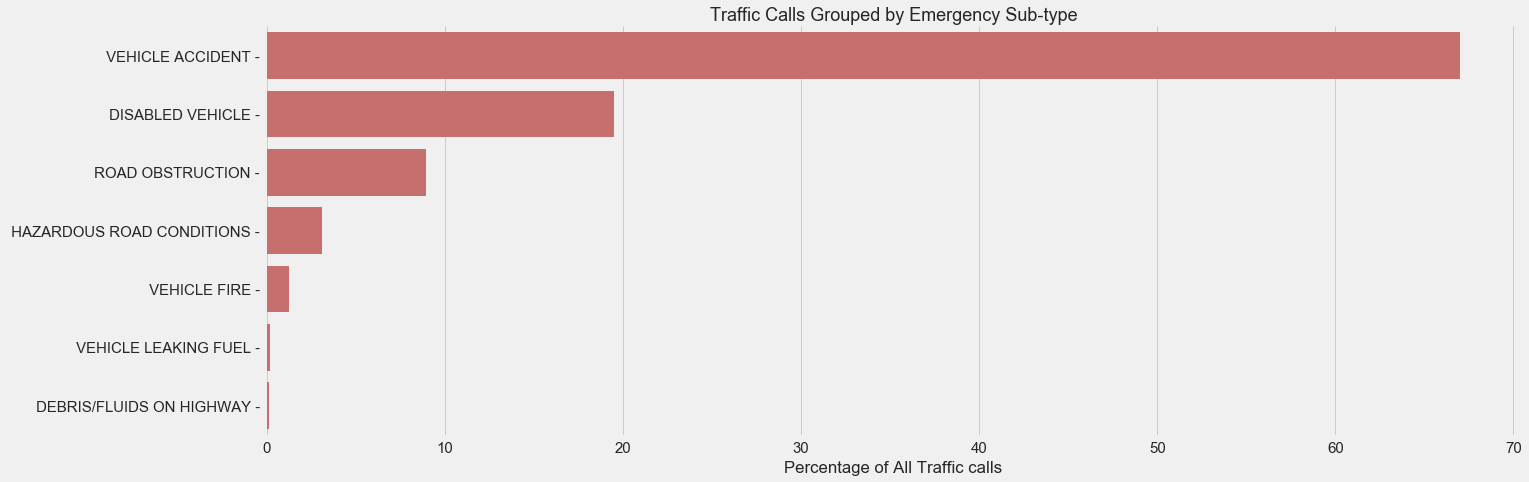

In [22]:
grouped = grouped_by_traffictype
plt.style.use('fivethirtyeight')

xi = grouped.values[:,0]/sum(grouped.values[:,0])*100
yi = grouped.index
plt.subplots(figsize=(20,7))
sns.barplot(x=xi,y=yi,color='r')

sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale=2)   
sns.despine(left=True, bottom=True)

sns.set(font_scale=1.5)
plt.xlim=(0,100)
plt.ylabel("")
plt.xlabel("Percentage of All Traffic calls")
plt.title('Traffic Calls Grouped by Emergency Sub-type')
plt.savefig('images/traffic_subtype.png', bbox_inches="tight")
plt.show()

In [23]:
grouped_by_firetype = df_cat[df_cat['emergency_type']=='Fire'].groupby('emergency_subtype').agg({
    'emergency_type':'count'}).sort_values('emergency_type')[::-1][:10]/len(df_cat)*100

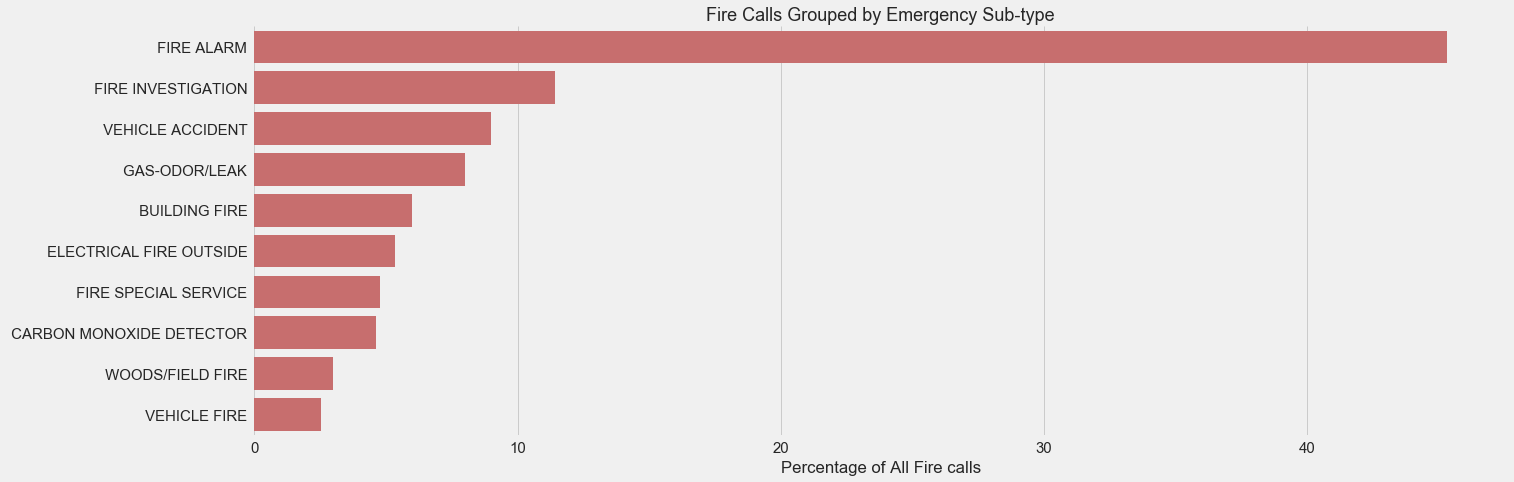

In [24]:
grouped = grouped_by_firetype
plt.style.use('fivethirtyeight')

xi = grouped.values[:,0]/sum(grouped.values[:,0])*100
yi = grouped.index
plt.subplots(figsize=(20,7))
sns.barplot(x=xi,y=yi,color='r')

sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale=2)   
sns.despine(left=True, bottom=True)

sns.set(font_scale=1.5)
plt.xlim=(0,100)
plt.ylabel("")
plt.xlabel("Percentage of All Fire calls")
plt.title('Fire Calls Grouped by Emergency Sub-type')
plt.savefig('images/fire_subtype.png', bbox_inches="tight")
plt.show()

## 2. Location-based Exploration

### 2.1. Emergency categories by town

In [25]:
count_by_town = df_cat[df_cat['emergency_type'] == 'EMS'].groupby('town').agg({'town':'count'}).sort_values('town')[::-1][:20]

C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'town' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


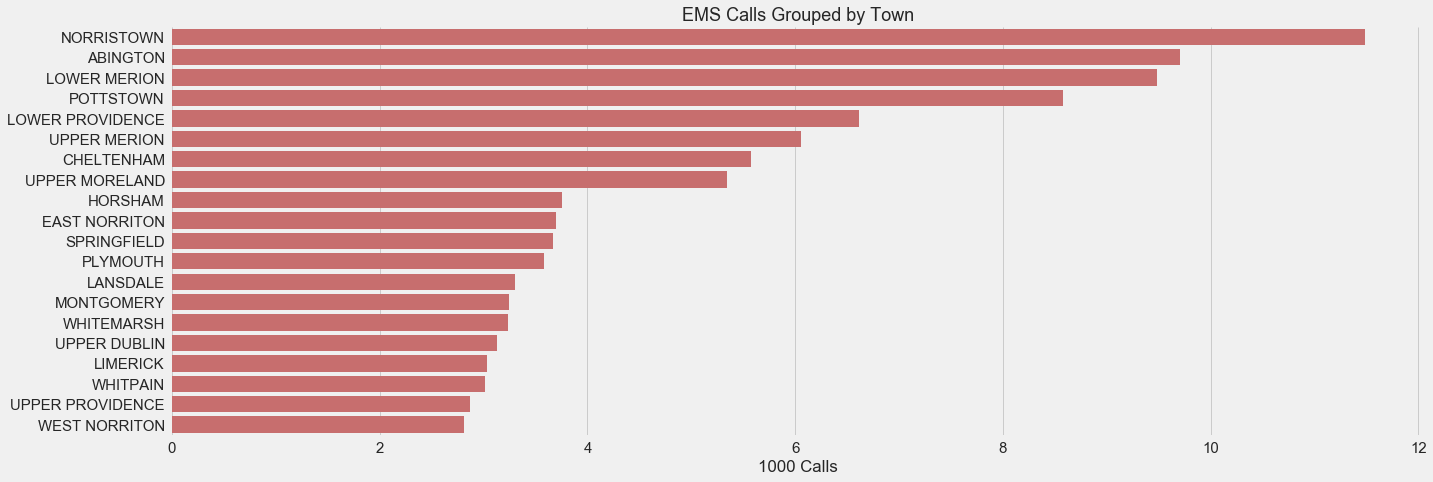

In [26]:
grouped = count_by_town
plt.style.use('fivethirtyeight')

xi = grouped.values[:,0]/1000
yi = grouped.index
plt.subplots(figsize=(20,7))
sns.barplot(x=xi,y=yi,color='r')

sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale=2)   
sns.despine(left=True, bottom=True)

sns.set(font_scale=1.5)
plt.xlim=(0,100)
plt.ylabel("")
plt.xlabel("1000 Calls")
plt.title('EMS Calls Grouped by Town')
plt.savefig('images/ems_town.png', bbox_inches="tight")
plt.show()

In [27]:
count_by_zip = df_cat[df_cat['emergency_type'] == 'EMS'].groupby('zip').agg({'zip':'count'}).sort_values('zip')[::-1].iloc[:20]
count_by_zip.columns = ['count']

C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'zip' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


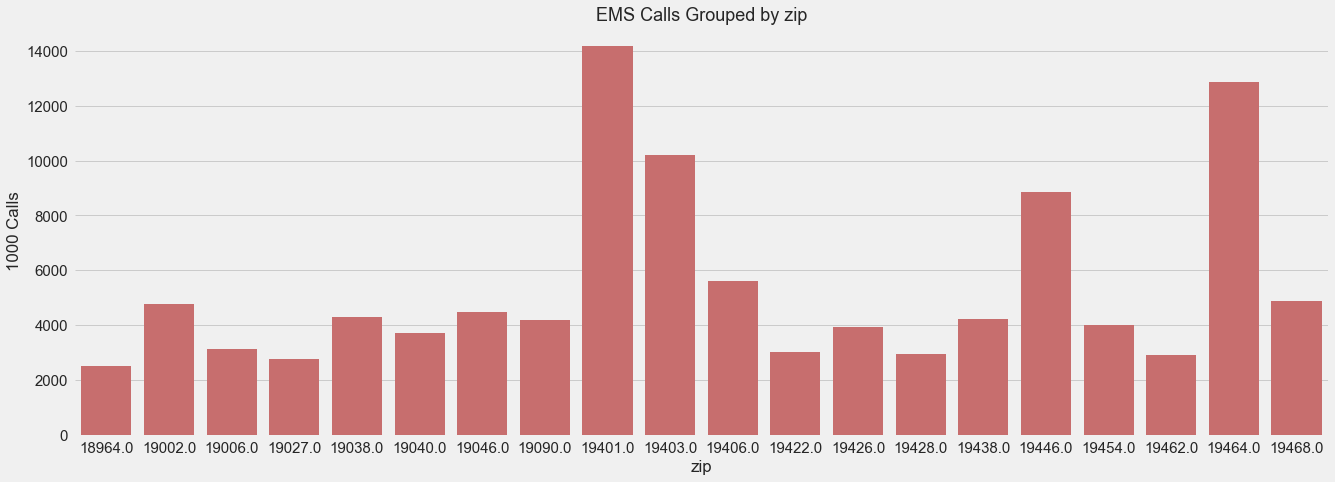

In [28]:
grouped = count_by_zip
plt.style.use('fivethirtyeight')

yi = count_by_zip['count']
xi = count_by_zip.index
plt.subplots(figsize=(20,7))
sns.barplot(x=xi,y=yi,color='r')

sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale=2)   
sns.despine(left=True, bottom=True)

sns.set(font_scale=1.5)
plt.xlim=(0,100)
plt.ylabel("1000 Calls")
plt.title('EMS Calls Grouped by zip')
plt.show()

In [29]:
count_by_zip = df_cat.groupby('zip').agg({'zip':'count'}).sort_values('zip')[::-1]
count_by_zip['cumsum_percent'] = count_by_zip.cumsum()/len(df)*100
count_by_zip.columns = ['count','cumsum_percent']

C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'zip' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [30]:
count_by_zip[count_by_zip['cumsum_percent']<81].count()/len(count_by_zip)
# 80% of all EMS calls originated only from about 25% of zip codes
# 99% of all EMS calls originated only from about 45% of zip codes

count             0.2
cumsum_percent    0.2
dtype: float64

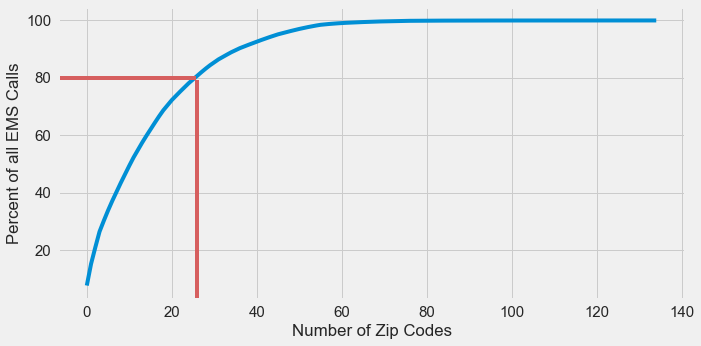

In [31]:
plt.style.use('fivethirtyeight')

plt.plot(range(len(count_by_zip)),count_by_zip['cumsum_percent'])
plt.xlabel('Number of Zip Codes')
plt.ylabel('Percent of all EMS Calls')
plt.axhline(y = 80,xmin = 0,xmax =0.22,color = 'r')
plt.axvline(x = 26,ymax = 0.75,color='r')

plt.show()

In [32]:
print (str(len(df_cat['zip'].unique()))+' unique zip codes.')
print (str(len(df_cat['town'].unique()))+ ' unique towns.')

135 unique zip codes.
69 unique towns.


## Plot all calls on map

<img src ="images/calls_by_zip.png">

## Plot EMS calls on map

In [33]:
only_EMS_view = df_cat[df_cat['emergency_type']=='EMS']

In [34]:
only_EMS_view.to_csv('segregated_data.csv')

In [35]:
only_EMS_view

,latitude,longitude,description,zip,emergency_type,emergency_subtype,time,town,address,if_emergency
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS,HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS,NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS,RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS,SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
16,40.243258,-75.286552,SUSQUEHANNA AVE & W MAIN ST; LANSDALE; Statio...,19446.0,EMS,RESPIRATORY EMERGENCY,2015-12-10 17:42:44,LANSDALE,SUSQUEHANNA AVE & W MAIN ST,1
17,40.312181,-75.574260,CHARLOTTE ST & MILES RD; NEW HANOVER; Station...,19525.0,EMS,DIZZINESS,2015-12-10 17:41:54,NEW HANOVER,CHARLOTTE ST & MILES RD,1
18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS,VEHICLE ACCIDENT,2015-12-10 17:43:29,NORRISTOWN,PENN ST & ARCH ST,1


In [36]:
df_cat['zip'].unique()

array([19525., 19446., 19401., 19044., 19426., 19438., 19462., 19428.,
       19040., 19027., 18936., 18974., 19031., 19403., 19422., 19085.,
       18964., 19038., 19406., 19468., 19010., 19095., 19464., 19444.,
       19041., 19440., 19405., 19002., 19096., 19454., 19465., 19004.,
       19066., 19072., 18041., 19046., 19090., 19012., 19025., 19473.,
       18073., 18969., 18074., 19460., 19001., 18054., 19009., 19006.,
       19035., 19150., 19075., 19034., 19151., 19453., 19003., 18914.,
       19512., 18976., 19120., 18915., 18076., 19477., 19087., 18966.,
       19131., 19128., 19083., 19053., 19475., 18960., 19504., 18070.,
       19492., 18932., 19118., 18092., 19490., 19518., 18056., 19119.,
       19107., 17752., 19111., 18927., 19435., 18951., 19472., 19503.,
       19126., 19505., 19423., 19138., 36107., 18036., 19116., 19139.,
       19129., 19115., 19355., 77316., 19457., 19082., 19127., 19443.,
       17555., 19520., 19063., 19020., 19404., 19382., 19474., 19057.,
      

In [37]:
us_pop = pd.read_csv('us-population-by-zip-code/population_by_zip_2010.csv')

In [38]:
us_pop.head()

,population,minimum_age,maximum_age,gender,zipcode,geo_id
0,50,30.0,34.0,female,61747,8600000US61747
1,5,85.0,NaN,male,64120,8600000US64120
2,1389,30.0,34.0,male,95117,8600000US95117
3,231,60.0,61.0,female,74074,8600000US74074
4,56,0.0,4.0,female,58042,8600000US58042


In [39]:
us_pop_by_zip = us_pop[us_pop['zipcode'].isin(df_cat['zip'].unique())].groupby('zipcode').agg({'population':'sum'})

In [40]:
result = pd.concat([us_pop_by_zip, count_by_zip], axis=1, sort=False)

In [41]:
result.dropna(inplace=True)

In [42]:
result.sort_values('population').corr()
# As seen, population and EMS calls are very poorly correlated

,population,count,cumsum_percent
population,1.000000,0.249869,-0.229612
count,0.249869,1.000000,-0.977542
cumsum_percent,-0.229612,-0.977542,1.000000


## 3. Analyze EMS Calls according to time

C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


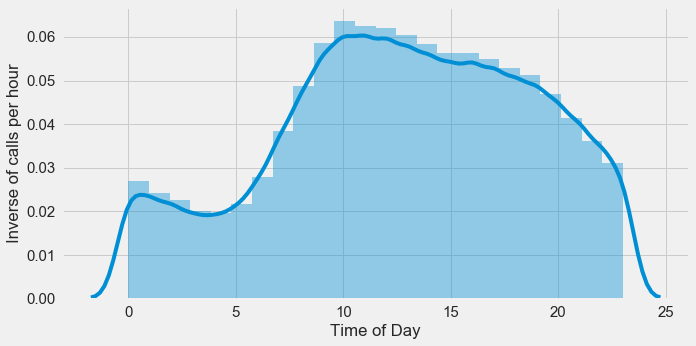

In [43]:
plt.style.use('fivethirtyeight')
sns.distplot(df_cat[df_cat['emergency_type'] == 'EMS']['time'].dt.hour,bins=24)
plt.ylabel('Inverse of calls per hour')
plt.xlabel('Time of Day')

plt.show()

C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


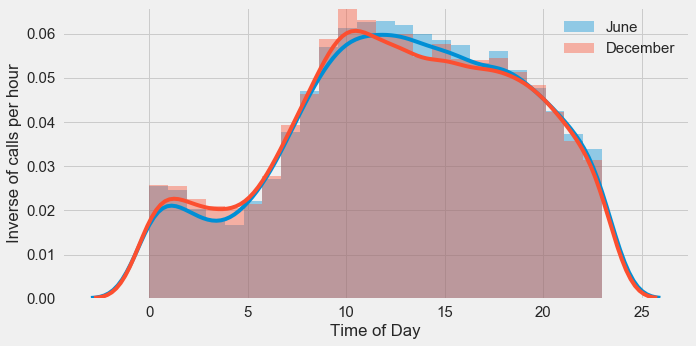

In [44]:
plt.style.use('fivethirtyeight')
sns.distplot(df_cat[df_cat['emergency_type'] == 'EMS']['time'].dt.hour[df_cat['time'].dt.month==6],bins=24,label='June')
sns.distplot(df_cat[df_cat['emergency_type'] == 'EMS']['time'].dt.hour[df_cat['time'].dt.month==12],bins=24,label='December')
plt.ylabel('Inverse of calls per hour')
plt.xlabel('Time of Day')

plt.legend()
plt.show()

C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


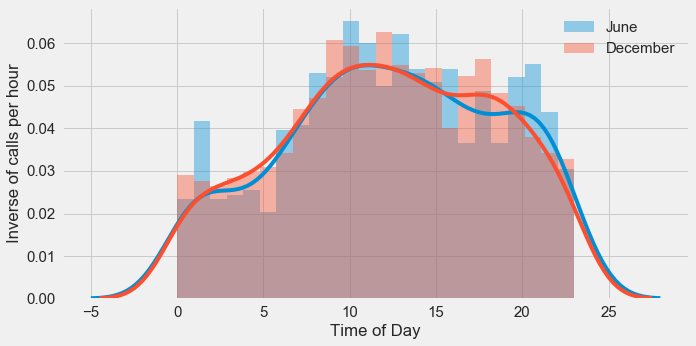

In [45]:
plt.style.use('fivethirtyeight')
sns.distplot(df_cat[df_cat['emergency_subtype'] == ' RESPIRATORY EMERGENCY']['time'].dt.hour[df_cat['time'].dt.month==6],bins=24,label='June')
sns.distplot(df_cat[df_cat['emergency_subtype'] == ' RESPIRATORY EMERGENCY']['time'].dt.hour[df_cat['time'].dt.month==12],bins=24,label='December')
plt.ylabel('Inverse of calls per hour')
plt.xlabel('Time of Day')

plt.legend()
plt.show()

In [46]:
df_cat['date'] = df_cat['time'].dt.date
df_cat.head()

,latitude,longitude,description,zip,emergency_type,emergency_subtype,time,town,address,if_emergency,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS,HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,2015-12-10


In [47]:
daily_count = df_cat[df_cat['zip']==19401.0].groupby('date').agg({'if_emergency':'count'}).sort_values('date')
daily_count.head()#['year'] = 

,if_emergency
date,
2015-12-10,9
2015-12-11,30
2015-12-12,30
2015-12-13,28
2015-12-14,34


In [48]:
daily_count.describe()

,if_emergency
count,835.00000
mean,26.51018
std,6.97294
min,6.00000
25%,22.00000
50%,26.00000
75%,30.00000
max,83.00000


C:\Users\kdabhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


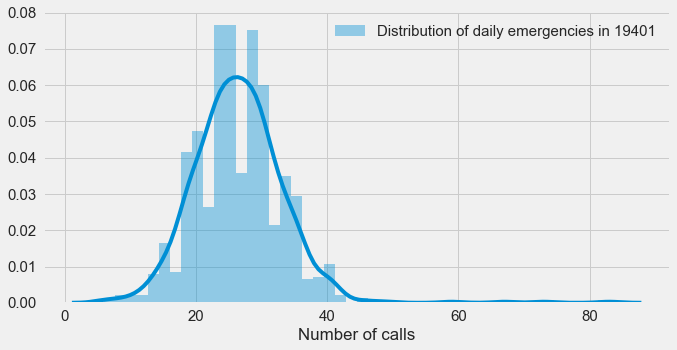

In [49]:
plt.style.use('fivethirtyeight')
sns.distplot(daily_count,label='Distribution of daily emergencies in 19401')
plt.xlabel('Number of calls')
plt.legend()
plt.show()

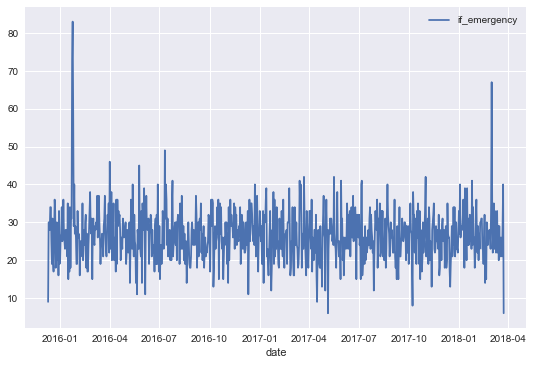

In [50]:
plt.style.use('seaborn')
daily_count.plot()